<a href="https://colab.research.google.com/github/tusita3660/LBS-Project/blob/main/ANN_Regression_Health_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Regression - Health Insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/refs/heads/master/Datasets/insurance.csv')

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.isnull().sum() # missing value check

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
insurance_data['sex'].unique() #label encoder
insurance_data['smoker'].unique() #label encoder
insurance_data['region'].unique() #one hot encoder

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_encoder = LabelEncoder()
le_encoder.fit(insurance_data['sex'])
insurance_data['sex'] = le_encoder.transform(insurance_data['sex'])

In [ ]:
le_encoder.fit(insurance_data['smoker'])
insurance_data['smoker'] = le_encoder.transform(insurance_data['smoker'])

In [ ]:
region_categorical = pd.get_dummies(insurance_data['region'], drop_first = True).astype('int')

In [ ]:
insurance_df = pd.concat([insurance_data, region_categorical], axis = 1)

In [ ]:
insurance_df = insurance_df.drop('region', axis = 1)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


<Axes: xlabel='charges'>

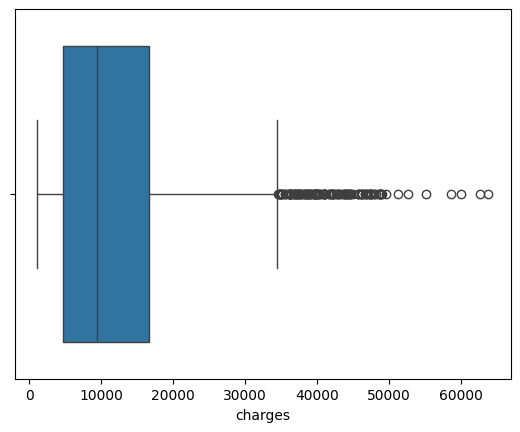

In [ ]:
sns.boxplot(insurance_df['charges'], orient = 'h') # outliers

<Axes: xlabel='charges', ylabel='Density'>

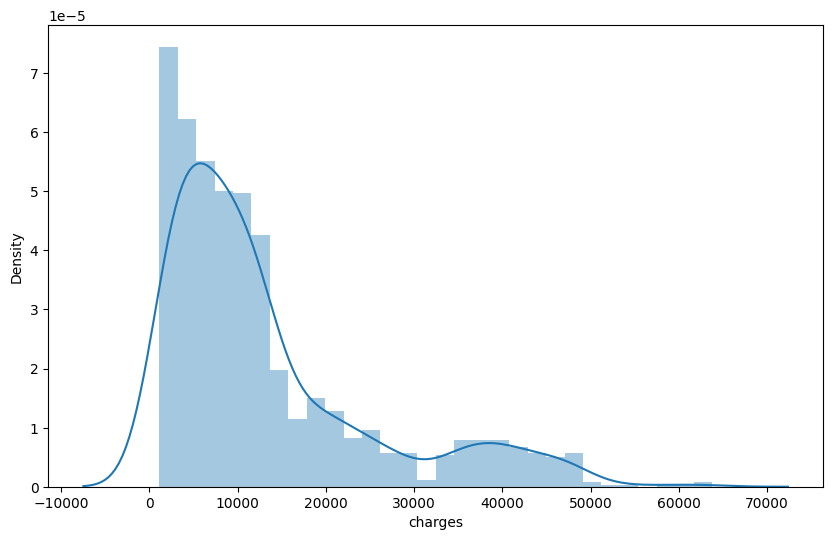

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,6))
sns.distplot(insurance_df['charges'])

In [ ]:
from scipy.stats import zscore
insurance_df[zscore(insurance_df['charges']) > 3]

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
34,28,1,36.400,1,1,51194.55914,0,0,1
543,54,0,47.410,0,1,63770.42801,0,1,0
577,31,0,38.095,1,1,58571.07448,0,0,0
819,33,0,35.530,0,1,55135.40209,1,0,0
1146,60,1,32.800,0,1,52590.82939,0,0,1
1230,52,1,34.485,3,1,60021.39897,1,0,0
1300,45,1,30.360,0,1,62592.87309,0,1,0


In [ ]:
insurance_df = insurance_df.drop([34, 543, 577, 819, 1146, 1230, 1300])

##### Features & Target

In [ ]:
X = insurance_df.drop('charges', axis = 1)
Y = insurance_df['charges']

Split Data into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
# 80 % = training set & 20 % = testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Regression

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop #optimizer- RMSprop, Adam, SGD

In [ ]:
def build_model1():
  model = Sequential()
  # units = #neurons in each layer 2^n, inpur_shape = # features
  model.add(Dense(units =128, activation = 'relu', input_shape = [8]))
  # hidden layer - I
  model.add(Dense(units =256, activation = 'relu'))
  # hidden layer - II
  model.add(Dense(units =512, activation = 'relu'))
  # output layer
  model.add(Dense(units =1))
  # Optimizers
  optimizers= RMSprop(learning_rate = 0.001)
  # error/loss function
  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error',
                                                                              'mean_absolute_error'])  #regression
  return model


In [ ]:
model = build_model1()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,273 (649.50 KB)

 Trainable params: 166,273 (649.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# epochs = #iterations, batch_size = sample size per iteration, validation split = 20%
history = model.fit(x_train, y_train, epochs = 600, batch_size= 30, validation_split = 0.2)

Epoch 1/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 292988960.0000 - mean_absolute_error: 12693.0430 - mean_squared_error: 292988960.0000 - val_loss: 153525392.0000 - val_mean_absolute_error: 7511.7612 - val_mean_squared_error: 153525392.0000
Epoch 2/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 180917760.0000 - mean_absolute_error: 8645.2471 - mean_squared_error: 180917760.0000 - val_loss: 100405528.0000 - val_mean_absolute_error: 8251.7305 - val_mean_squared_error: 100405528.0000
Epoch 3/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 132240832.0000 - mean_absolute_error: 9355.3789 - mean_squared_error: 132240832.0000 - val_loss: 98612904.0000 - val_mean_absolute_error: 7718.6050 - val_mean_squared_error: 98612904.0000
Epoch 4/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135249696.0000 - mean_absolute_error: 9260.9766 - mean_squared_error: 135249696.0000 - val_loss: 98580248.0000 - val_mean_absolute_error: 7847.9282 - val_mean_squared_error: 98580248.0000
Epoch 

In [ ]:
pd.DataFrame(history.history)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,278126176.0,11783.635742,278126176.0,153525392.0,7511.761230,153525392.0
1,148194448.0,8210.036133,148194448.0,100405528.0,8251.730469,100405528.0
2,126823848.0,9102.483398,126823848.0,98612904.0,7718.604980,98612904.0
3,126594288.0,9025.666016,126594288.0,98580248.0,7847.928223,98580248.0
4,126122432.0,8990.775391,126122432.0,99835416.0,8263.325195,99835416.0
...,...,...,...,...,...,...
595,18950214.0,2509.197510,18950214.0,23032606.0,2078.916016,23032606.0
596,19311306.0,2486.235840,19311306.0,23928712.0,3658.936035,23928712.0
597,19066520.0,2540.912109,19066520.0,21684296.0,2166.024170,21684296.0
598,19172390.0,2461.059570,19172390.0,21169350.0,2629.253418,21169350.0


<Axes: >

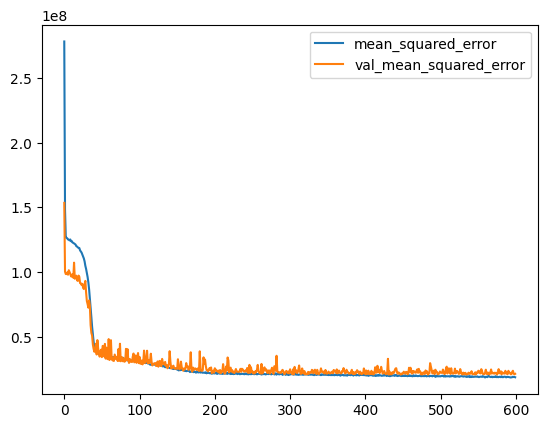

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [ ]:
predictions = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
from sklearn.metrics import r2_score
# The R² score, also known as the coefficient of determination, is a key metric in regression analysis
# Measures Proportion of variance in dependent variable that is predicted using independent variables.
# range (0,1)
r2_score(y_test, predictions)

0.8624005855899074

In [ ]:
results = pd.DataFrame(predictions, columns = ['Predicted Value'])

In [ ]:
results['Actual Value'] = np.array(y_test)

In [ ]:
results

,Predicted Value,Actual Value
0,23067.867188,21259.37795
1,14049.195312,12730.99960
2,8675.447266,7682.67000
3,43917.945312,44260.74990
4,6622.194824,4889.03680
...,...,...
262,3693.678467,1815.87590
263,13383.273438,11658.11505
264,3222.005615,1639.56310
265,7229.802734,5354.07465


<Axes: >

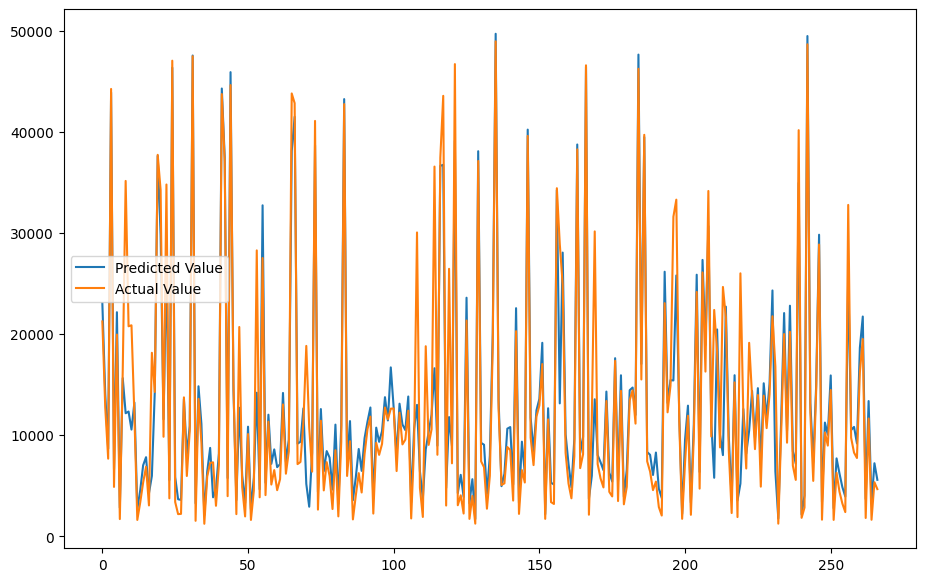

In [ ]:
results.plot(figsize = (11,7))